<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Deep Learning Assignment</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=5px>
                  <b> V S Shabarish </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# 1. Questions on tensor operations

## 1.1 (i) Write a program to create a variable with a size of 2x3 and a constant (2 marks)


In [1]:
import tensorflow as tf
import numpy as np

# (i) Create a variable with a size of 2x3 and a constant
variable_2x3 = tf.Variable(tf.random.normal([2, 3], mean=0, stddev=1))
constant_value = tf.constant([2.0])


# Display the results
print("(i) Variable with a size of 2x3:")
print(variable_2x3)

print("(i) Constant:")
print(constant_value)

(i) Variable with a size of 2x3:
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 1.3542618 ,  0.8143972 ,  0.724648  ],
       [-0.03333885,  0.54060036, -0.03918624]], dtype=float32)>
(i) Constant:
tf.Tensor([2.], shape=(1,), dtype=float32)


## (ii) Write a program to create a variable "tf3" with a size 3x3 and convert it to a numpy size of 3x3. Display rank of the matrix (2 marks)


In [2]:

# (ii) Create a variable tf3 with a size 3x3, convert it to a numpy array, and display its rank
tf3 = tf.Variable(tf.random.normal([3, 3], mean=0, stddev=1))
tf3_numpy = tf3.numpy()
rank = np.linalg.matrix_rank(tf3_numpy)

print("(ii) Variable tf3 as a Numpy array:")
print(tf3_numpy)

print("(ii) Rank of the matrix tf3:")
print(rank)



(ii) Variable tf3 as a Numpy array:
[[-1.6927481  -0.9334945   0.35075918]
 [ 0.77752554 -0.59511614 -0.87487155]
 [-0.09271199  1.4018276  -0.28652692]]
(ii) Rank of the matrix tf3:
3


## (iii) Write a program to randomly generate 3x3 matrix and assign 0 to the first row first column element (1 mark)

In [3]:

# (iii) Randomly generate a 3x3 matrix and assign 0 to the first row, first column element
random_matrix = tf.Variable(tf.random.normal([3, 3], mean=0, stddev=1))
random_matrix[0, 0].assign(0.0)

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[ 0.0000000e+00, -1.9294995e-01, -1.0311524e-03],
       [-1.8655231e+00, -2.6288709e-01, -1.1807500e+00],
       [ 6.1837912e-01, -2.5408792e-01,  8.3799632e-03]], dtype=float32)>

In [4]:

print("(iii) 3x3 Matrix with 0 at the first row, first column:")
print(random_matrix.numpy())

(iii) 3x3 Matrix with 0 at the first row, first column:
[[ 0.0000000e+00 -1.9294995e-01 -1.0311524e-03]
 [-1.8655231e+00 -2.6288709e-01 -1.1807500e+00]
 [ 6.1837912e-01 -2.5408792e-01  8.3799632e-03]]


## 1.2 (i) write python code and Compute the cross entropy for the below values (2 marks).
### Distribution_1 = [4.13, 6.8, -2.1]
### Distribution_2 = [1, 0, 0]

In [5]:
# Define the two distributions
Distribution_1 = [4.13, 6.8, -2.1]
Distribution_2 = [1, 0, 0]

# Convert the distributions to TensorFlow tensors
Distribution_1_tensor = tf.convert_to_tensor(Distribution_1, dtype=tf.float32)
Distribution_2_tensor = tf.convert_to_tensor(Distribution_2, dtype=tf.float32)

# Compute the cross-entropy
cross_entropy = tf.keras.losses.CategoricalCrossentropy()
print("Cross-Entropy:", cross_entropy(Distribution_2_tensor, Distribution_1_tensor).numpy())


Cross-Entropy: 0.75987756


## (ii) Write a program to create a variable "tensor" with a size 5x6 and reshape it to a size of 3x10 (3 marks)

In [6]:
import numpy as np

# Create a 5x6 matrix
original_shape = (5, 6)
tensor = np.arange(30).reshape(original_shape)

# Reshape to a 3x10 matrix
new_shape = (3, 10)
reshaped_tensor = tensor.reshape(new_shape)

print("Original Tensor (5x6):")
print(tensor)
print("\nReshaped Tensor (3x10):")
print(reshaped_tensor)


Original Tensor (5x6):
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]

Reshaped Tensor (3x10):
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]


# Questions on basic neural network model designing and compiling Dataset

### 2.1 Print shape of the data and understand how many images of different classes exist in thisdataset. Visualize some images using matplotlib.Convert the RGB Image to Grayscale ( For easier computation) . Normalize the data so that data is in range 0-1.Reshape train and test images into one dimensional vector for train data

Data shape: (940, 64, 64, 3)
Labels shape: (940,)


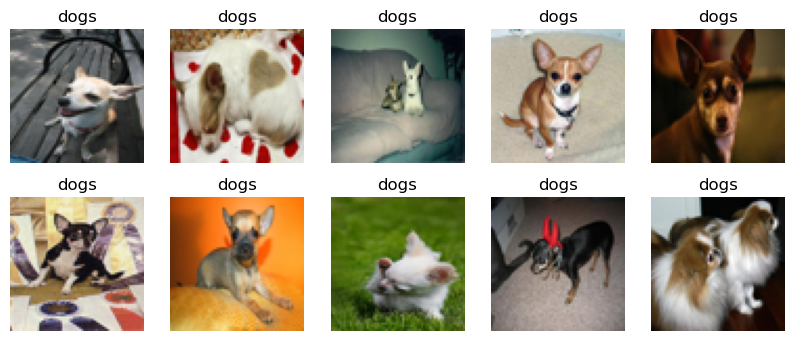

Data shape: (940, 64, 64, 1)
Training data Count: (940,)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the path to the dataset
dataset_path = "C:/Users/vssha/Documents/DeepLearning/Project1/Dataset/Train"

# Define the classes
classes = ["dogs", "wolves"]

# Define the image size
img_size = (64, 64)

# Load the dataset
data = []
labels = []
for i, cls in enumerate(classes):
    path = os.path.join(dataset_path, cls)
    for img in os.listdir(path):
        try:
            img_arr = np.array(Image.open(os.path.join(path, img)).resize(img_size))
            data.append(img_arr)
            labels.append(i)
        except:
            pass

# Convert the data to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Print the shape of the data
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

# Visualize some images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(data[i*5+j])
        axs[i, j].axis("off")
        axs[i, j].set_title(classes[labels[i*5+j]])
plt.show()

# Convert the RGB images to grayscale
data = np.mean(data, axis=-1, keepdims=True)

# Normalize the data
data1 = data / 255.0

# Reshape the data
data1 = data1.reshape(data.shape[0], -1)

# Print the shape of the data
print("Data shape:", data.shape)
print("Training data Count:", labels.shape)


### 2.1 Print shape of the data and understand how many images of different classes exist in thisdataset. Visualize some images using matplotlib.Convert the RGB Image to Grayscale ( For easier computation) . Normalize the data so that data is in range 0-1.Reshape train and test images into one dimensional vector for test data

Data shape: (63, 64, 64, 3)
Labels shape: (63,)


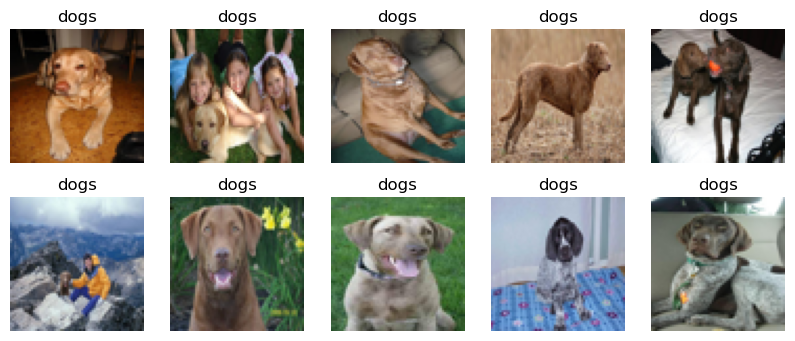

Data shape: (63, 64, 64, 1)
Testing data count : (63,)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the path to the dataset
dataset_path = "C:/Users/vssha/Documents/DeepLearning/Project1/Dataset/Valid"

# Define the classes
classes = ["dogs", "wolves"]

# Define the image size
img_size = (64, 64)

# Load the dataset
data = []
labels = []
for i, cls in enumerate(classes):
    path = os.path.join(dataset_path, cls)
    for img in os.listdir(path):
        try:
            img_arr = np.array(Image.open(os.path.join(path, img)).resize(img_size))
            data.append(img_arr)
            labels.append(i)
        except:
            pass

# Convert the data to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Print the shape of the data
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

# Visualize some images
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(data[i*5+j])
        axs[i, j].axis("off")
        axs[i, j].set_title(classes[labels[i*5+j]])
plt.show()

# Convert the RGB images to grayscale
data = np.mean(data, axis=-1, keepdims=True)

# Normalize the data
data1 = data / 255.0

# Reshape the data
data1 = data.reshape(data.shape[0], -1)

# Print the shape of the data
print("Data shape:", data.shape)
print("Testing data count :", labels.shape)


In [9]:
data.shape

(63, 64, 64, 1)

### 2.2 Construct the Deep Neural Network to classify the 2 classes of images available in the dataset.Compile and fit the model (No restrictions on Neural network architecture. Feel free to explore and optimize.) Compute the performance accuracy of the model created.(Using DNN architecture)

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# Define the model
model = Sequential([
    Flatten(input_shape=(img_size[0], img_size[1], 1)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(2, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Fit the model
model.fit(data, labels, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(data, labels)
print("Test accuracy:", test_acc)


Epoch 1/10
2/2 [==============================] - 2s 181ms/step - loss: 327.6764 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 0s 30ms/step - loss: 233.6694 - accuracy: 0.5400 - val_loss: 631.2979 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 30ms/step - loss: 240.0625 - accuracy: 0.5200 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 21ms/step - loss: 121.3209 - accuracy: 0.5400 - val_loss: 174.3105 - val_accuracy: 0.1538
Epoch 5/10
2/2 [==============================] - 0s 35ms/step - loss: 121.1453 - accuracy: 0.4400 - val_loss: 27.3940 - val_accuracy: 0.3846
Epoch 6/10
2/2 [==============================] - 0s 29ms/step - loss: 53.3570 - accuracy: 0.6200 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 21ms/step - loss: 103.0498 - accuracy: 0.5400 - val_loss: 73.4576 - val_accuracy

<font color='blue'><h3>Here we can see the test accuracy is only 56% and it is overfitting</h3></font>

### 2.2 Construct the Deep Neural Network to classify the 2 classes of images available in the dataset.Compile and fit the model (No restrictions on Neural network architecture. Feel free to explore and optimize.) Compute the performance accuracy of the model created.(Using CNN architecture)

In [11]:
#!pip install tensorflow==2.9
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [12]:
#pip install opencv-python

In [13]:
# Importing the libraries for the layers of CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
# Importing the library for image handling/preprocessing
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Image Augumentation
# create few more images by stretching, zooming, shrinking, rotating, flipping the available images
#This will make the model to learn very generically about the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.,
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect')

In [15]:
data_dir='C:/Users/vssha/Documents/DeepLearning/Project1/'

In [16]:
# Laod the images from the train and test folders by resizing it for 128x128
#Image augumentaion defined above will be performed for each batch of images 
# class mode is "categorical" for multiclass problem ("binary" for binomial problem) 
training_set=train_datagen.flow_from_directory(data_dir+'Dataset/Train',
                                              target_size=(128,128),
                                              batch_size=20,
                                              class_mode='categorical')

# Total of 2736 images corresponds to 5 differnt classses are loaded in to this notebook 
                                                   #from the training folder (harddrive)

Found 974 images belonging to 2 classes.


In [17]:
test_datagen=ImageDataGenerator(rescale=1/255.) # We dont experiment the test data generally

In [18]:
test_set=test_datagen.flow_from_directory(data_dir+'Dataset/Valid',
                                              target_size=(128,128),
                                              batch_size=20,
                                              class_mode='categorical')

# Total of 934 images corresponds to 5 differnt classses are loaded in to this notebook 
                                                   #from the testing folder (harddrive)

Found 66 images belonging to 2 classes.


In [19]:
from keras.layers import LeakyReLU

In [20]:
classifier = Sequential() # Sequentialy we are going to add the layers in this network

#Define the convolution layer with 16 kernals each of size 3x3
# This layer will accept the images of size 128x128x3
# Activation function for this layer is ReLU
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

#Maxpool layer generally defined at the end of each convolution layer. 
#Poolsize of 2x2 will bring down the feature map(convolution layer output) size by half
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Define the second convolution and maxpool layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Third Convolution and Maxpool Layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the feature map produced by the last convolution layer as single vector
classifier.add(Flatten())

#Add the hidden layers
classifier.add(Dense(units=60, activation="relu"))

# Output layer should have 5 neurons as this data is having 5 classes of flowers
#"Sigmoid" activation function is preferred for Binary problem 
classifier.add(Dense(units = 2, activation = 'sigmoid'))

In [31]:
#compile the CNN model with 'adam' optimizer to minimize the loss (cross entropy)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
# Fit(Train) the model using trainset of data
# How many time the weight needs to be updated in one iteratin will be decided by steps_per_epoch
# How many iteration for which the training need to be happen will be decided by 'epochs'
classifier.fit_generator(training_set,
                         steps_per_epoch =940//20,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 63//20)

Epoch 1/20
47/47 [==============================] - 10s 190ms/step - loss: 0.5367 - accuracy: 0.7527 - val_loss: 0.5248 - val_accuracy: 0.7500
Epoch 2/20
47/47 [==============================] - 9s 183ms/step - loss: 0.4889 - accuracy: 0.7660 - val_loss: 0.4666 - val_accuracy: 0.8000
Epoch 3/20
47/47 [==============================] - 9s 183ms/step - loss: 0.4901 - accuracy: 0.7730 - val_loss: 0.4279 - val_accuracy: 0.8000
Epoch 4/20
47/47 [==============================] - 9s 188ms/step - loss: 0.5025 - accuracy: 0.7559 - val_loss: 0.4272 - val_accuracy: 0.8667
Epoch 5/20
47/47 [==============================] - 9s 184ms/step - loss: 0.5076 - accuracy: 0.7473 - val_loss: 0.4589 - val_accuracy: 0.7667
Epoch 6/20
47/47 [==============================] - 9s 184ms/step - loss: 0.4940 - accuracy: 0.7794 - val_loss: 0.4097 - val_accuracy: 0.8500
Epoch 7/20
47/47 [==============================] - 9s 181ms/step - loss: 0.4742 - accuracy: 0.7773 - val_loss: 0.4928 - val_accuracy: 0.7667
Epoch

In [23]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)      

<font color='blue'><h3>Here we can see the test accuracy is around 85% which is better than training data accuracy</h3></font>

In [24]:
tf.keras.models.save_model(classifier,'./animal_model_arch_weights')

INFO:tensorflow:Assets written to: ./animal_model_arch_weights\assets


INFO:tensorflow:Assets written to: ./animal_model_arch_weights\assets


In [25]:
my_saved_model=tf.keras.models.load_model('./animal_model_arch_weights')

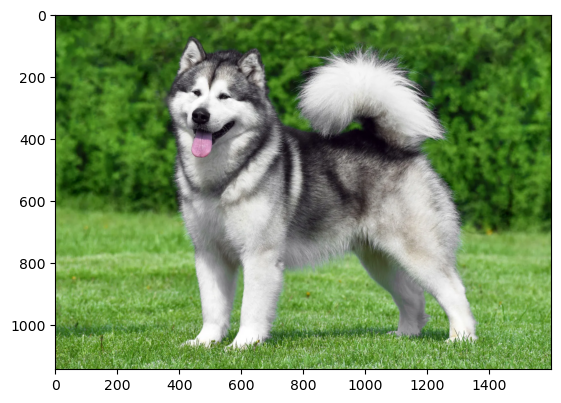

The test image class is : 0
The Predicted class name is:
dogs


In [26]:
img=cv2.imread('./malm.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

test_img1=cv2.resize(img,(128,128))


test_img1=test_img1/255.

test_img2=np.expand_dims(test_img1,axis=0)

ypred=my_saved_model.predict(test_img2,verbose=0)
#print(train_set.class_indices)

print('The test image class is :',ypred.argmax())

#training_set.class_indices
class_name={'dogs': 0, 'wolves': 1}

pos=np.array(list(class_name.values()))==ypred.argmax()
name=np.array(list(class_name.keys()))
print('The Predicted class name is:')
print(name[pos][0])

<font color='blue'><h3>Here the model is correctly able to predict a Wolf like dog breed called Alaskan Malamute as a dog</h3></font>

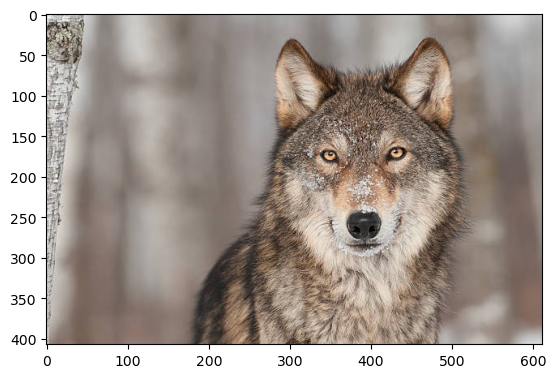

The test image class is : 1
The Predicted class name is:
wolves


In [30]:
img=cv2.imread('./wolf.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

test_img1=cv2.resize(img,(128,128))


test_img1=test_img1/255.

test_img2=np.expand_dims(test_img1,axis=0)

ypred=my_saved_model.predict(test_img2,verbose=0)
#print(train_set.class_indices)

print('The test image class is :',ypred.argmax())

#training_set.class_indices
class_name={'dogs': 0, 'wolves': 1}

pos=np.array(list(class_name.values()))==ypred.argmax()
name=np.array(list(class_name.keys()))
print('The Predicted class name is:')
print(name[pos][0])

<font color='blue'><h3>Here the model is correctly able to predict a Wolf</h3></font>

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(Y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm )

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

NameError: name 'Y_test' is not defined